# Classification using Logistic Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
dataset = pd.read_csv('heart.csv')

In [3]:
dataset.shape

(303, 14)

In [4]:
dataset.iloc[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [7]:
X.shape

(303, 13)

In [8]:
y.shape

(303,)

In [9]:
X[:5]

array([[ 0.9521966 ,  0.68100522,  1.97312292,  0.76395577, -0.25633371,
         2.394438  , -1.00583187,  0.01544279, -0.69663055,  1.08733806,
        -2.27457861, -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, -0.09273778,  0.07219949,
        -0.41763453,  0.89896224,  1.63347147, -0.69663055,  2.12257273,
        -2.27457861, -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, -0.09273778, -0.81677269,
        -0.41763453, -1.00583187,  0.97751389, -0.69663055,  0.31091206,
         0.97635214, -0.71442887, -0.51292188],
       [ 0.18017482,  0.68100522,  0.03203122, -0.66386682, -0.19835726,
        -0.41763453,  0.89896224,  1.23989692, -0.69663055, -0.20670527,
         0.97635214, -0.71442887, -0.51292188],
       [ 0.29046364, -1.46841752, -0.93851463, -0.66386682,  2.08204965,
        -0.41763453,  0.89896224,  0.58393935,  1.43548113, -0.37924438,
         0.97635214, -0.71442887, -0.51292188]])

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [11]:
X_train.shape

(242, 13)

In [12]:
y_train.shape

(242,)

In [13]:
X_test.shape

(61, 13)

In [14]:
y_test.shape

(61,)

In [15]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

/home/subrat/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
y_infer = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_infer)

array([[21,  5],
       [ 3, 32]])

In [17]:
classifier.coef_

array([[-0.18028099, -0.85324698,  0.82384699, -0.31538846, -0.220187  ,
         0.04656329,  0.0511453 ,  0.2699902 , -0.50193218, -0.50347455,
         0.46085519, -0.73039052, -0.48285855]])

In [18]:
X_test = scaler.inverse_transform(X_test)

In [19]:
X_test[:,3]

array([138., 118., 146., 114., 110., 160., 108., 128., 134., 130., 112.,
       150., 125., 118., 140., 160., 120., 130., 150., 112., 138., 110.,
       160., 138., 140., 100., 110., 128., 170., 130., 120., 122., 120.,
       120., 130., 140., 140., 150., 120., 138., 150., 150., 130., 125.,
       110., 130., 100., 160., 136., 145., 130., 120., 135., 120., 130.,
       180., 118., 125., 120., 130., 100.])

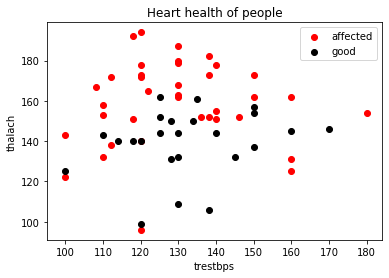

In [20]:
plt.scatter(X_test[y_infer==1,3], X_test[y_infer==1,7], color='red', label='affected')
plt.scatter(X_test[y_infer==0,3], X_test[y_infer==0,7], color='black', label='good')
plt.title('Heart health of people')
plt.legend()
plt.xlabel('trestbps')
plt.ylabel('thalach')
plt.show()

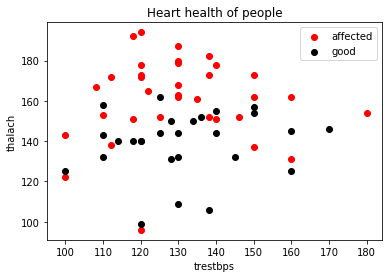

In [21]:
plt.scatter(X_test[y_test==1,3], X_test[y_test==1,7], color='red', label='affected')
plt.scatter(X_test[y_test==0,3], X_test[y_test==0,7], color='black', label='good')
plt.title('Heart health of people')
plt.legend()
plt.xlabel('trestbps')
plt.ylabel('thalach')
plt.show()